In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
# df = crr_plt.T[np.abs(crr_plt.sum(axis=0)) > 250]

# plt.figure(figsize=(30, 30))

# sns.heatmap(df)

In [2]:
ee_scores = pd.read_csv('data/EE_histologic scoring_SEEM scores_63_biopsy.csv')

In [3]:
xls = pd.ExcelFile('data/SEEM_CAPGAN_Morphometry_Dropbox.xlsx')
morph_seem = pd.read_excel(xls, 'Duodenal-SEEMClean')
# df2 = pd.read_excel(xls, 'Sheet2')

In [4]:
df = pd.read_csv('/project/DSone/mappingEE.csv')

In [5]:
ee_map = df.dropna().reset_index(drop=True)

In [6]:
morph_seem['File'] = morph_seem['File'].str.split('_').str[0] + '_' + np.append(np.array(morph_seem['File'].str.split('_').str[1][:9].str[1]), np.array(morph_seem['File'].str.split('_').str[1][9:]))

In [7]:
morph_seem.columns

Index(['File', 'Unnamed: 1', 'SEEM EE Scores_AKU Pathologists',
       'Villus Length', 'Crypt Length', 'V:C Ratio', 'Goblet Cells/100 epi',
       'IELs/100 epi', 'Neutro/100 epi', 'MIC/2500um2_LE_Redo',
       'neutro/2500um2', 'eosino/2500um2',
       'Intramucosal Brunner Glands (# of foci)', 'Comments', 'Annotator',
       'Giardia_Path_Report', 'Giardia_Path_Report.1', 'HPylori_Path_Report'],
      dtype='object')

In [8]:
ee_scores['SEEM ID'] = ee_scores['SEEM ID'].str.replace('*', '')

In [9]:
ee_scores = pd.merge(ee_scores, ee_map, left_on='SEEM ID', right_on='FileNames')

In [10]:
ee_scores

,SEEM ID,Unnamed: 1,Acute inflammation,Eosinophil infiltration,Chronic inflammation-lamina propria,Intra-epithelial lymphocytes,Villus architecture,Intramucosal Brunner glands,Foveolar cell metaplasia,Goblet cell density,Paneth cell density,Enterocyte injury,Epithelial detachment,total score (out of 37),num,FileNames
0,02-158-0033,biopsy#1,0,1,2,2,3,0,0,2,2.0,0,0,12,SEEM_1,02-158-0033
1,02-135-0205,Biopsy#3,0,0,1,1,1,1,0,0,3.0,0,1,8,SEEM_3,02-135-0205
2,03-046-0082,biopsy#4,0,2,2,0,1,1,0,0,3.0,0,1,10,SEEM_4,03-046-0082
3,03-020-0179,biopsy#5,1,0,1,0,1,0,0,0,3.0,0,0,6,SEEM_5,03-020-0179
4,03-007-0361,biopsy#6,0,0,1,0,0,1,0,0,1.0,0,0,3,SEEM_6,03-007-0361
5,02-145-0164,biopsy#7,0,0,1,0,0,1,0,1,2.0,0,0,5,SEEM_7,02-145-0164
6,03-046-0691,biopsy#8,0,0,1,2,2,1,0,0,3.0,0,0,9,SEEM_8,03-046-0691
7,01-029-0976,biopsy#11,0,1,1,0,1,0,0,0,3.0,0,0,6,SEEM_11,01-029-0976
8,02-182-1058,biopsy#15,1,0,2,1,1,1,0,0,3.0,0,0,9,SEEM_15,02-182-1058
9,02-135-1207,biopsy#16,2,0,2,0,1,0,0,0,0.0,1,2,8,SEEM_16,02-135-1207


In [11]:
vc = pd.merge(ee_scores, morph_seem, left_on='num', right_on='File')

In [12]:
vc.columns

Index(['SEEM ID', 'Unnamed: 1_x', 'Acute inflammation',
       'Eosinophil infiltration', 'Chronic inflammation-lamina propria',
       'Intra-epithelial lymphocytes', 'Villus architecture',
       'Intramucosal Brunner glands', 'Foveolar cell metaplasia',
       'Goblet cell density', 'Paneth cell density', 'Enterocyte injury',
       'Epithelial detachment', 'total score (out of 37)  ', 'num',
       'FileNames', 'File', 'Unnamed: 1_y', 'SEEM EE Scores_AKU Pathologists',
       'Villus Length', 'Crypt Length', 'V:C Ratio', 'Goblet Cells/100 epi',
       'IELs/100 epi', 'Neutro/100 epi', 'MIC/2500um2_LE_Redo',
       'neutro/2500um2', 'eosino/2500um2',
       'Intramucosal Brunner Glands (# of foci)', 'Comments', 'Annotator',
       'Giardia_Path_Report', 'Giardia_Path_Report.1', 'HPylori_Path_Report'],
      dtype='object')

In [13]:
x_cols = list(morph_seem.columns)
x_cols.remove('File')
x_cols.remove('Unnamed: 1')
x_cols.remove('Annotator') 
x_cols.remove('Giardia_Path_Report')
x_cols.remove('Comments')
y_cols = list(ee_scores.columns)

In [14]:
vc.head()

,SEEM ID,Unnamed: 1_x,Acute inflammation,Eosinophil infiltration,Chronic inflammation-lamina propria,Intra-epithelial lymphocytes,Villus architecture,Intramucosal Brunner glands,Foveolar cell metaplasia,Goblet cell density,...,Neutro/100 epi,MIC/2500um2_LE_Redo,neutro/2500um2,eosino/2500um2,Intramucosal Brunner Glands (# of foci),Comments,Annotator,Giardia_Path_Report,Giardia_Path_Report.1,HPylori_Path_Report
0,02-158-0033,biopsy#1,0,1,2,2,3,0,0,2,...,0.0,22,0,1,2.0,NaN,LE,Y,1.0,NaN
1,02-135-0205,Biopsy#3,0,0,1,1,1,1,0,0,...,0.0,27,0,2,0.0,NaN,LE,N,2.0,NaN
2,03-046-0082,biopsy#4,0,2,2,0,1,1,0,0,...,0.0,28,0,2,NaN,NaN,LE,Y,1.0,NaN
3,03-020-0179,biopsy#5,1,0,1,0,1,0,0,0,...,0.0,14,0,3,0.0,NaN,LE,Y,1.0,NaN
4,03-007-0361,biopsy#6,0,0,1,0,0,1,0,0,...,0.0,27,0,0,NaN,NaN,LE,N,2.0,NaN


In [15]:
vc.corr()[x_cols].loc[vc.corr().index.isin(y_cols)]

,SEEM EE Scores_AKU Pathologists,Villus Length,Crypt Length,V:C Ratio,Goblet Cells/100 epi,IELs/100 epi,Neutro/100 epi,MIC/2500um2_LE_Redo,neutro/2500um2,eosino/2500um2,Intramucosal Brunner Glands (# of foci),Giardia_Path_Report.1,HPylori_Path_Report
Acute inflammation,0.189378,0.104686,0.472091,-0.135402,0.172660,0.058102,0.050940,-0.279973,-0.155729,0.270154,0.008731,-0.035426,NaN
Eosinophil infiltration,0.464946,0.037938,-0.056424,0.324375,0.063096,-0.064806,0.044388,0.192215,0.039711,-0.001031,-0.016465,-0.407046,NaN
Chronic inflammation-lamina propria,0.425686,-0.169790,-0.202359,0.041889,-0.175841,0.209956,-0.063965,-0.005327,0.107410,-0.042618,-0.372843,-0.535769,NaN
Intra-epithelial lymphocytes,0.648913,-0.203796,-0.176707,0.047815,-0.053562,0.122025,0.188242,-0.188706,0.204264,0.096045,0.066942,-0.256174,NaN
Villus architecture,0.737287,0.084463,-0.068350,0.252002,0.168105,0.028617,0.052538,-0.058486,0.092543,0.108731,-0.005041,-0.254053,NaN
Intramucosal Brunner glands,0.045704,-0.019182,-0.000220,-0.073576,0.041074,-0.128320,-0.101236,0.075640,0.185801,0.101204,-0.100116,0.064171,NaN
Foveolar cell metaplasia,-0.081601,-0.132860,-0.128383,-0.032735,-0.009684,-0.086675,-0.077795,0.026099,-0.073268,0.058812,0.672604,0.155700,NaN
Goblet cell density,0.462539,0.117583,-0.135148,0.216715,0.002999,0.107391,0.162611,-0.264242,-0.008430,0.133976,0.186605,-0.313051,NaN
Paneth cell density,0.309427,0.215419,0.013601,0.235747,0.122572,-0.082805,0.148867,-0.325948,-0.033733,0.456509,0.049991,-0.250924,NaN
Enterocyte injury,0.067594,-0.163181,-0.158594,-0.047571,0.012075,-0.010439,-0.137842,-0.046221,-0.129756,0.063361,0.563480,0.102776,NaN


In [16]:
vc.corr().index

Index(['Acute inflammation', 'Eosinophil infiltration',
       'Chronic inflammation-lamina propria', 'Intra-epithelial lymphocytes',
       'Villus architecture', 'Intramucosal Brunner glands',
       'Foveolar cell metaplasia', 'Goblet cell density',
       'Paneth cell density', 'Enterocyte injury', 'Epithelial detachment',
       'total score (out of 37)  ', 'SEEM EE Scores_AKU Pathologists',
       'Villus Length', 'Crypt Length', 'V:C Ratio', 'Goblet Cells/100 epi',
       'IELs/100 epi', 'Neutro/100 epi', 'MIC/2500um2_LE_Redo',
       'neutro/2500um2', 'eosino/2500um2',
       'Intramucosal Brunner Glands (# of foci)', 'Comments',
       'Giardia_Path_Report.1', 'HPylori_Path_Report'],
      dtype='object')

In [17]:
morph_seem.columns

Index(['File', 'Unnamed: 1', 'SEEM EE Scores_AKU Pathologists',
       'Villus Length', 'Crypt Length', 'V:C Ratio', 'Goblet Cells/100 epi',
       'IELs/100 epi', 'Neutro/100 epi', 'MIC/2500um2_LE_Redo',
       'neutro/2500um2', 'eosino/2500um2',
       'Intramucosal Brunner Glands (# of foci)', 'Comments', 'Annotator',
       'Giardia_Path_Report', 'Giardia_Path_Report.1', 'HPylori_Path_Report'],
      dtype='object')

In [18]:
from pydoc import help
from scipy.stats.stats import pearsonr

In [19]:
a = {'V:C Ratio': ['Acute inflammation', 'Chronic inflammation-lamina propria', 
                   'Villus architecture', 'total score (out of 37)  '],
     'Crypt Length': ['Acute inflammation', 'Chronic inflammation-lamina propria', 
                   'Villus architecture', 'total score (out of 37)  '],
     'Goblet Cells/100 epi': ['Acute inflammation', 'Chronic inflammation-lamina propria', 
                   'Goblet cell density', 'total score (out of 37)  '],
     'IELs/100 epi': ['Chronic inflammation-lamina propria', 'Intra-epithelial lymphocytes',
                     'total score (out of 37)  '],
     'MIC/2500um2_LE_Redo': ['Chronic inflammation-lamina propria',
                             'total score (out of 37)  '],
     'neutro/2500um2': ['Acute inflammation', 'total score (out of 37)  '],
     'eosino/2500um2': ['Acute inflammation', 'total score (out of 37)  ']
     
    }

In [20]:
final = pd.DataFrame()

for x in a.keys():
    for y in a[x]:
        tmp = vc[[x, y]]
        tmp = tmp.dropna()
        arr = [x, y, str(pearsonr(np.array(tmp[x]), np.array(tmp[y]))[0]), str(pearsonr(np.array(tmp[x]), np.array(tmp[y]))[1])]
        
        tmp_df = pd.DataFrame(data=arr).T
        
        final = pd.concat([final, tmp_df], ignore_index=True)
        

In [21]:
final.to_csv('morph_ee_score_corr.csv', index=False)

In [22]:
morph_seem = pd.merge(morph_seem, ee_map, left_on='File', right_on='num')

In [99]:
biomarkers = pd.read_csv('data/biomarkers.csv')
biomarkers = biomarkers.drop(['Date of Biopsy', 'Comments', 'studyid'], axis=1)

biomarkers['StudyId'] = biomarkers['STUDY ID #                                               ']
biomarkers = biomarkers.drop(['STUDY ID #                                               '], axis=1)

In [100]:
y_cols = list(biomarkers.columns)

In [101]:
morph_seem_1 = morph_seem.drop(['File', 'Unnamed: 1', 'SEEM EE Scores_AKU Pathologists', 'Annotator', 'Giardia_Path_Report'], axis=1)

In [102]:
x_cols = list(morph_seem_1.columns)

In [103]:
morph_seem_1.columns

Index(['Villus Length', 'Crypt Length', 'V:C Ratio', 'Goblet Cells/100 epi',
       'IELs/100 epi', 'Neutro/100 epi', 'MIC/2500um2_LE_Redo',
       'neutro/2500um2', 'eosino/2500um2',
       'Intramucosal Brunner Glands (# of foci)', 'Comments',
       'Giardia_Path_Report.1', 'HPylori_Path_Report', 'num', 'FileNames'],
      dtype='object')

In [104]:
morph_bio_corr = pd.merge(morph_seem_1, biomarkers, left_on='FileNames', right_on='StudyId').corr()

x_cols.remove('num')
x_cols.remove('FileNames')
morph_bio_corr = morph_bio_corr[x_cols].loc[morph_bio_corr.index.isin(y_cols)]

In [105]:
morph_bio_corr['x'] = morph_bio_corr.index

In [106]:
morph_bio_corr.to_csv('morph_biomarker_corr.csv')

In [109]:
mbcf = pd.read_csv('morph_biomarker_corr_filtered.csv')

In [110]:
mbcf.index = np.array(mbcf['Unnamed: 0'])

In [111]:
mbcf = mbcf.drop(['Unnamed: 0'], axis=1)

In [112]:
y_cols = list(mbcf.index)
x_cols = list(mbcf.columns)

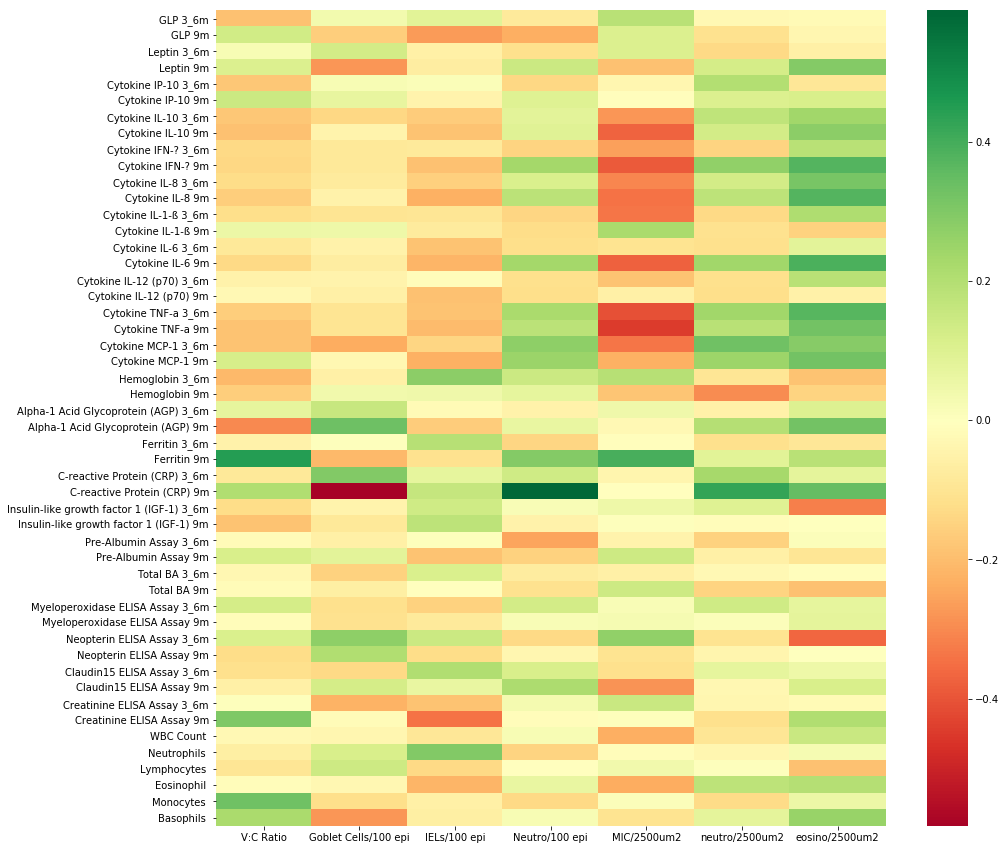

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = mbcf

plt.figure(figsize=(15, 15))

sns.heatmap(df, center=0, cmap='RdYlGn')

In [145]:
x_cols = list(mbcf.index)
# y_cols = list(mbcf.columns)
d = pd.DataFrame()
import pingouin as pg
m = pd.merge(morph_seem_1, biomarkers, left_on='FileNames', right_on='StudyId')

for a in x_cols:
    for b in y_cols:
        tmp = pg.corr(m[a], m[b])
        tmp['a'] = a
        tmp['b'] = b
        d = pd.concat([d, tmp])
d.columns = list(pg.corr(m[a], m[b]).columns) + ['a', 'b']

In [151]:
k = d[d['p-val'] <= 0.05]

In [153]:
k[k['a'] == 'C-reactive Protein (CRP) 9m']

,n,r,CI95%,r2,adj_r2,p-val,BF10,power,a,b
pearson,12,-0.583,"[-0.87, -0.01]",0.340,0.193,0.046795,2.097,0.544,C-reactive Protein (CRP) 9m,Goblet Cells/100 epi
pearson,12,0.588,"[0.02, 0.87]",0.346,0.201,0.044215,2.188,0.554,C-reactive Protein (CRP) 9m,Neutro/100 epi


In [136]:
for i, v in enumerate(y_cols):
    if v == 'MIC/2500um2':
        y_cols[i] = 'MIC/2500um2_LE_Redo'

y_cols

['V:C Ratio',
 'Goblet Cells/100 epi',
 'IELs/100 epi',
 'Neutro/100 epi',
 'MIC/2500um2_LE_Redo',
 'neutro/2500um2',
 'eosino/2500um2']

In [35]:
rectal_morph = pd.read_csv('rectal_seem.csv')
rectal_morph = rectal_morph.drop('Unnamed: 8', axis=1)

In [36]:
ee_scores.head()

,SEEM ID,Unnamed: 1,Acute inflammation,Eosinophil infiltration,Chronic inflammation-lamina propria,Intra-epithelial lymphocytes,Villus architecture,Intramucosal Brunner glands,Foveolar cell metaplasia,Goblet cell density,Paneth cell density,Enterocyte injury,Epithelial detachment,total score (out of 37),num,FileNames
0,02-158-0033,biopsy#1,0,1,2,2,3,0,0,2,2.0,0,0,12,SEEM_1,02-158-0033
1,02-135-0205,Biopsy#3,0,0,1,1,1,1,0,0,3.0,0,1,8,SEEM_3,02-135-0205
2,03-046-0082,biopsy#4,0,2,2,0,1,1,0,0,3.0,0,1,10,SEEM_4,03-046-0082
3,03-020-0179,biopsy#5,1,0,1,0,1,0,0,0,3.0,0,0,6,SEEM_5,03-020-0179
4,03-007-0361,biopsy#6,0,0,1,0,0,1,0,0,1.0,0,0,3,SEEM_6,03-007-0361


In [37]:
rectal_morph_score = pd.merge(rectal_morph, ee_scores, left_on='SEEM_ID', right_on='SEEM ID')

In [38]:
x_cols = list(rectal_morph.columns)
x_cols.remove('SEEM_ID')
x_cols.remove('File')

In [39]:
y_cols = ['Acute inflammation', 'Eosinophil infiltration', 'Chronic inflammation-lamina propria']

In [40]:
df = rectal_morph_score.corr()[x_cols].loc[rectal_morph_score.corr().index.isin(y_cols)].dropna()

In [41]:
df

,Neutro/2500um2 LP,Neutro in EP/ 3crypt,MICs/2500um2 LP,Lympho in EP/3 crypt,Eosinophils/2500um2 LP,Eosinophils in EP/3crypt
Acute inflammation,0.427271,0.311703,-0.419842,0.039605,0.366569,0.114700
Eosinophil infiltration,-0.273051,-0.163098,-0.208075,-0.216441,-0.091060,0.263932
Chronic inflammation-lamina propria,0.006446,0.037222,-0.269518,-0.185234,-0.249377,0.135526


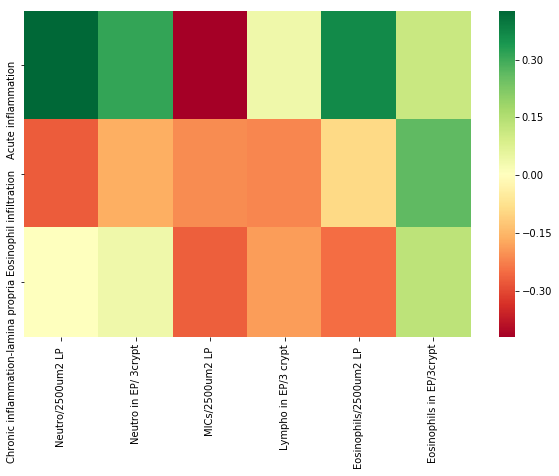

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))

sns.heatmap(df, cmap='RdYlGn')

In [44]:
for a in x_cols:
    for b in y_cols:
        c, p = pearsonr(rectal_morph_score[a], rectal_morph_score[b])
        print(a, b, c, p)

Neutro/2500um2 LP  Acute inflammation 0.42727133097547776 0.14532498919012451
Neutro/2500um2 LP  Eosinophil infiltration -0.2730507967185821 0.36672474122574955
Neutro/2500um2 LP  Chronic inflammation-lamina propria 0.006446382789117475 0.9833248957208139
Neutro in EP/ 3crypt Acute inflammation 0.3117028890829085 0.2998563304555103
Neutro in EP/ 3crypt Eosinophil infiltration -0.16309808466586873 0.5944539932637996
Neutro in EP/ 3crypt Chronic inflammation-lamina propria 0.03722187502390989 0.9039105717481536
MICs/2500um2 LP  Acute inflammation -0.4198419715869184 0.15321954971082882
MICs/2500um2 LP  Eosinophil infiltration -0.20807542543317484 0.49513802099752247
MICs/2500um2 LP  Chronic inflammation-lamina propria -0.2695179828397426 0.3732036649186898
Lympho in EP/3 crypt Acute inflammation 0.039604707024958774 0.8977872630879197
Lympho in EP/3 crypt Eosinophil infiltration -0.21644132425867035 0.47755110869962064
Lympho in EP/3 crypt Chronic inflammation-lamina propria -0.185234055

In [45]:
b = biomarkers[['Myeloperoxidase ELISA Assay 3_6m',
 'Myeloperoxidase ELISA Assay 9m',
 'Neopterin ELISA Assay 3_6m',
 'Neopterin ELISA Assay 9m', 'StudyId']]

In [46]:
rectal_morph_bio = pd.merge(rectal_morph, b, left_on='SEEM_ID', right_on='StudyId')

In [47]:
rectal_morph_bio.corr()[x_cols].loc[rectal_morph_bio.corr().index.isin(list(b.columns))]

,Neutro/2500um2 LP,Neutro in EP/ 3crypt,MICs/2500um2 LP,Lympho in EP/3 crypt,Eosinophils/2500um2 LP,Eosinophils in EP/3crypt
Myeloperoxidase ELISA Assay 3_6m,-0.300676,0.084165,0.026091,-0.201733,-0.102987,0.349504
Myeloperoxidase ELISA Assay 9m,-0.165857,-0.366245,0.292036,-0.460098,-0.077082,-0.264464
Neopterin ELISA Assay 3_6m,-0.386051,-0.440266,0.516317,-0.484975,-0.265188,-0.375890
Neopterin ELISA Assay 9m,-0.283845,-0.313836,-0.016330,-0.126230,-0.507230,-0.158868


In [50]:
y_cols = list(b.columns)
y_cols.remove('StudyId')

In [53]:
rectal_morph_bio.dropna()

,SEEM_ID,File,Neutro/2500um2 LP,Neutro in EP/ 3crypt,MICs/2500um2 LP,Lympho in EP/3 crypt,Eosinophils/2500um2 LP,Eosinophils in EP/3crypt,Myeloperoxidase ELISA Assay 3_6m,Myeloperoxidase ELISA Assay 9m,Neopterin ELISA Assay 3_6m,Neopterin ELISA Assay 9m,StudyId
0,02-037-1085,R_SEEM_26,1,1,6,12,1,5,8.600,14.100,4.1,8.4,02-037-1085
1,03-046-1338,R_SEEM_27,1,2,5,6,0,3,17.600,1.400,8.4,28.1,03-046-1338
2,03-025-1105,R_SEEM_28,0,2,7,7,2,4,58.700,6.100,7.2,6.1,03-025-1105
3,01-054-1376,R_SEEM_30,1,0,8,11,2,0,10.700,2.590,9.9,26.2,01-054-1376
5,02-135-1444,R_SEEM_32,6,6,5,10,6,1,8.581,3.062,5.5,5.1,02-135-1444
6,02-037-1224,R_SEEM_33,1,1,5,7,2,2,6.900,9.700,10.3,17.0,02-037-1224
7,03-001-1022,R_SEEM_34,1,1,5,9,2,3,2.628,9.400,18.9,11.4,03-001-1022
8,02-107-1744,R_SEEM_38,1,0,8,7,2,0,7.100,1.700,8.8,5.9,02-107-1744
11,03-012-2226,R_SEEM_44,0,0,11,5,1,0,7.988,69.828,23.3,14.1,03-012-2226


In [54]:
for a in x_cols:
    for b in y_cols:
        c, p = pearsonr(rectal_morph_bio.dropna()[a], rectal_morph_bio.dropna()[b])
        print(a, b, c, p)

Neutro/2500um2 LP  Myeloperoxidase ELISA Assay 3_6m -0.2702994513883368 0.48178406930932455
Neutro/2500um2 LP  Myeloperoxidase ELISA Assay 9m -0.31906377780270834 0.40265529814306344
Neutro/2500um2 LP  Neopterin ELISA Assay 3_6m -0.38605095832830827 0.3047856177993412
Neutro/2500um2 LP  Neopterin ELISA Assay 9m -0.28384497574882767 0.45918511415257274
Neutro in EP/ 3crypt Myeloperoxidase ELISA Assay 3_6m 0.1406713886501282 0.7181103185117166
Neutro in EP/ 3crypt Myeloperoxidase ELISA Assay 9m -0.3178548572519131 0.40454035329303845
Neutro in EP/ 3crypt Neopterin ELISA Assay 3_6m -0.44026588527430494 0.23563346637374238
Neutro in EP/ 3crypt Neopterin ELISA Assay 9m -0.3138361944261906 0.41083553523045907
MICs/2500um2 LP  Myeloperoxidase ELISA Assay 3_6m 0.04487636094016953 0.9087319161792575
MICs/2500um2 LP  Myeloperoxidase ELISA Assay 9m 0.7307454352228072 0.025327813943345653
MICs/2500um2 LP  Neopterin ELISA Assay 3_6m 0.5163168243889182 0.15471822553649336
MICs/2500um2 LP  Neopterin 

In [55]:
rectal_morph_bio

,SEEM_ID,File,Neutro/2500um2 LP,Neutro in EP/ 3crypt,MICs/2500um2 LP,Lympho in EP/3 crypt,Eosinophils/2500um2 LP,Eosinophils in EP/3crypt,Myeloperoxidase ELISA Assay 3_6m,Myeloperoxidase ELISA Assay 9m,Neopterin ELISA Assay 3_6m,Neopterin ELISA Assay 9m,StudyId
0,02-037-1085,R_SEEM_26,1,1,6,12,1,5,8.600,14.100,4.1,8.4,02-037-1085
1,03-046-1338,R_SEEM_27,1,2,5,6,0,3,17.600,1.400,8.4,28.1,03-046-1338
2,03-025-1105,R_SEEM_28,0,2,7,7,2,4,58.700,6.100,7.2,6.1,03-025-1105
3,01-054-1376,R_SEEM_30,1,0,8,11,2,0,10.700,2.590,9.9,26.2,01-054-1376
4,02-083-2847,R_SEEM_31,1,2,8,13,4,4,NaN,11.927,NaN,NaN,02-083-2847
5,02-135-1444,R_SEEM_32,6,6,5,10,6,1,8.581,3.062,5.5,5.1,02-135-1444
6,02-037-1224,R_SEEM_33,1,1,5,7,2,2,6.900,9.700,10.3,17.0,02-037-1224
7,03-001-1022,R_SEEM_34,1,1,5,9,2,3,2.628,9.400,18.9,11.4,03-001-1022
8,02-107-1744,R_SEEM_38,1,0,8,7,2,0,7.100,1.700,8.8,5.9,02-107-1744
9,01-010-1953,R_SEEM_39,0,2,13,17,0,0,8.301,1.363,NaN,NaN,01-010-1953


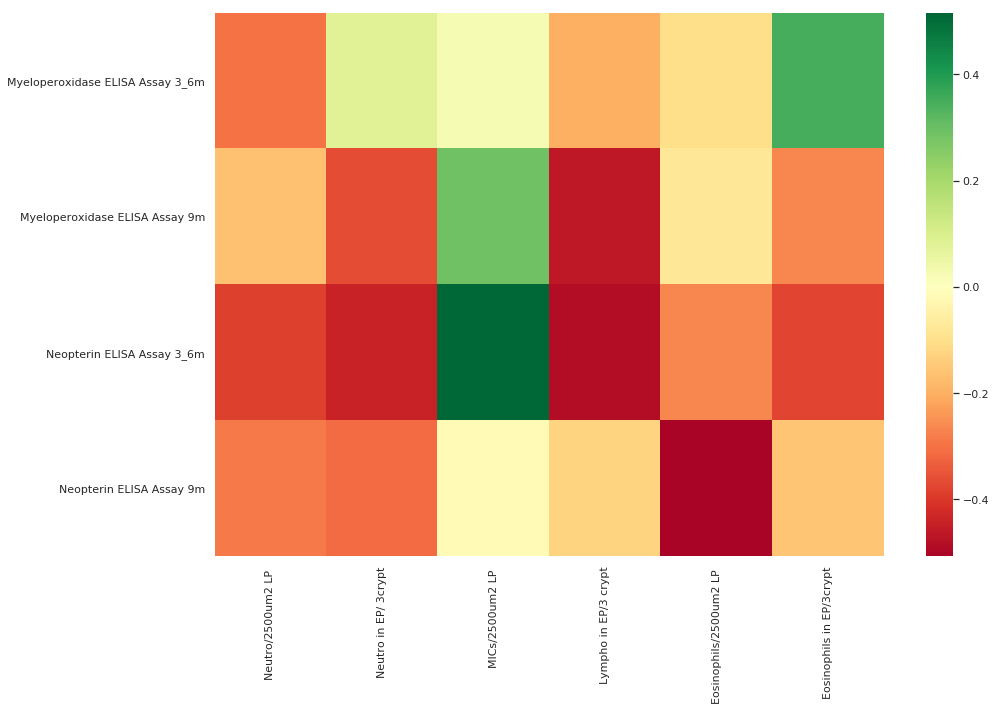

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 10))

sns.heatmap(rectal_morph_bio.corr()[x_cols].loc[rectal_morph_bio.corr().index.isin(list(b.columns))], center=0, cmap='RdYlGn')

In [59]:
df = rectal_morph_bio.corr()[x_cols].loc[rectal_morph_bio.corr().index.isin(list(b.columns))]

final = pd.DataFrame()

for x in list(df.index):
    for y in df.columns:
        tmp = rectal_morph_bio[[x, y]]
        tmp = tmp.dropna()
        arr = [x, y, str(pearsonr(np.array(tmp[x]), np.array(tmp[y]))[0]), str(pearsonr(np.array(tmp[x]), np.array(tmp[y]))[1])]
        
        tmp_df = pd.DataFrame(data=arr).T
        
        final = pd.concat([final, tmp_df], ignore_index=True)

In [60]:
final.to_csv('rectal_morph_biomarkers_corr_values.csv', index=False)

In [61]:
anthro = pd.read_csv('data/Copy of Anthro_with_morbidity_biopsy kids.csv')
yael = pd.read_csv('data/Copy of Yael final file 20190801 no names_LE.csv')
seem_id = pd.read_csv('data/Duodenal_Rectal_Biopsy_List_Toronto.csv')

In [62]:
seem_id = seem_id.dropna()

In [63]:
ids = list(yael[yael['studyid_'].isin(seem_id['SEEM_ID'])]['studyid'])

In [89]:
anthro_control = anthro[anthro['casecontrol'] == 'Control']

In [64]:
anthro_f = anthro[anthro['studyid'].isin(ids)].reset_index().drop('index', axis=1)

In [90]:
anthro_case = anthro_f.copy()

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(anthro_f['age'].values.reshape(-1, 1), anthro_f['haz'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
regr.coef_

array([[-0.04194199]])

In [68]:
pearsonr(anthro_f['age'].values, anthro_f['haz'].values)

(-0.23487547071954876, 1.6807645593439316e-18)

In [69]:
line_y = regr.predict(np.linspace(0, 24, 50).reshape(-1, 1)).T[0]

line_x = np.linspace(0, 24, 50)

In [70]:
anthro_f

,studyid,DOV,DOB,gender,weight,length,MUAC,source,age,vmon,...,sq22a,sq23a,ss2q22,ss2q24b,age_days,whz,haz,waz,comp,casecontrol
0,33,9-Dec-15,8-Dec-15,1,2.28,46.6,83.0,crf1,0,12,...,NaN,NaN,NaN,NaN,1,-1.96,-1.83,-2.51,NaN,Case
1,33,8-Mar-16,8-Dec-15,1,3.04,53.8,82.0,crf2,3,3,...,NaN,NaN,NaN,NaN,91,-4.00,-3.72,-5.92,NaN,Case
2,33,9-Apr-16,8-Dec-15,1,3.24,54.0,80.0,crf4,4,4,...,0.0,0.0,NaN,NaN,123,-3.35,-4.79,-6.45,NaN,Case
3,33,7-May-16,8-Dec-15,1,3.29,54.5,80.0,crf4,5,5,...,0.0,0.0,NaN,NaN,151,-3.57,-5.37,-7.01,NaN,Case
4,33,11-Jun-16,8-Dec-15,1,4.21,56.6,90.0,crf4,6,6,...,12.0,12.0,NaN,NaN,186,-2.11,-5.23,-5.61,NaN,Case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,2847,25-Oct-18,20-Apr-17,1,7.00,73.0,130.0,crf4,18,10,...,0.0,0.0,NaN,NaN,553,-2.84,-3.59,-3.77,NaN,Case
1356,2847,22-Nov-18,20-Apr-17,1,8.00,74.0,131.0,crf4,19,11,...,0.0,0.0,NaN,NaN,581,-2.01,-3.38,-3.08,NaN,Case
1357,2847,20-Dec-18,20-Apr-17,1,8.00,75.0,134.0,crf4,20,12,...,7.0,0.0,NaN,NaN,609,-1.72,-3.45,-2.92,NaN,Case
1358,2847,24-Jan-19,20-Apr-17,1,8.00,76.0,137.0,crf4,21,1,...,0.0,0.0,NaN,NaN,644,-2.24,-3.29,-3.20,NaN,Case


In [71]:
anthro_f['age'].values

array([ 0,  3,  4, ..., 20, 21, 22])

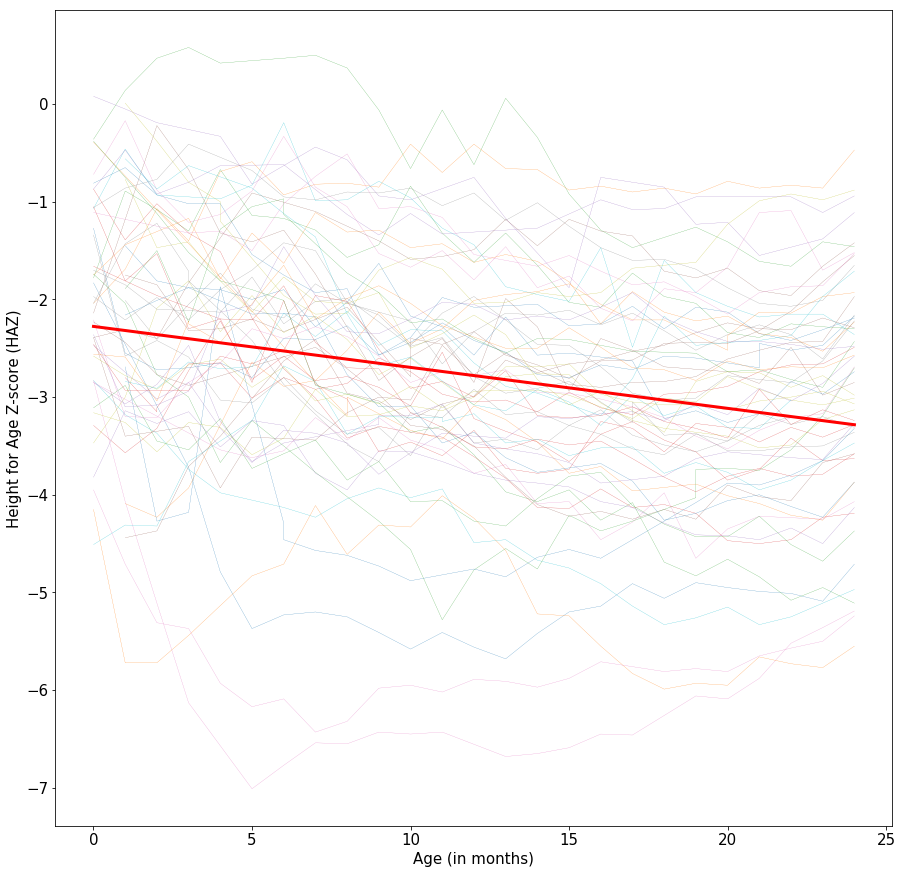

In [72]:
plt.figure(figsize=(15, 15))
plt.rcParams.update({'font.size': 15})

for stid in np.unique(anthro_f['studyid']):
    tmp = anthro_f[anthro_f['studyid']==stid]
    
    x = np.array(tmp['age'])
    y = np.array(tmp['haz'])
    
    plt.xlabel('Age (in months)')
    plt.ylabel('Height for Age Z-score (HAZ)')
    
    plt.plot(x, y, linewidth=0.2)
    
plt.plot(line_x, line_y, linewidth=3, color='red')

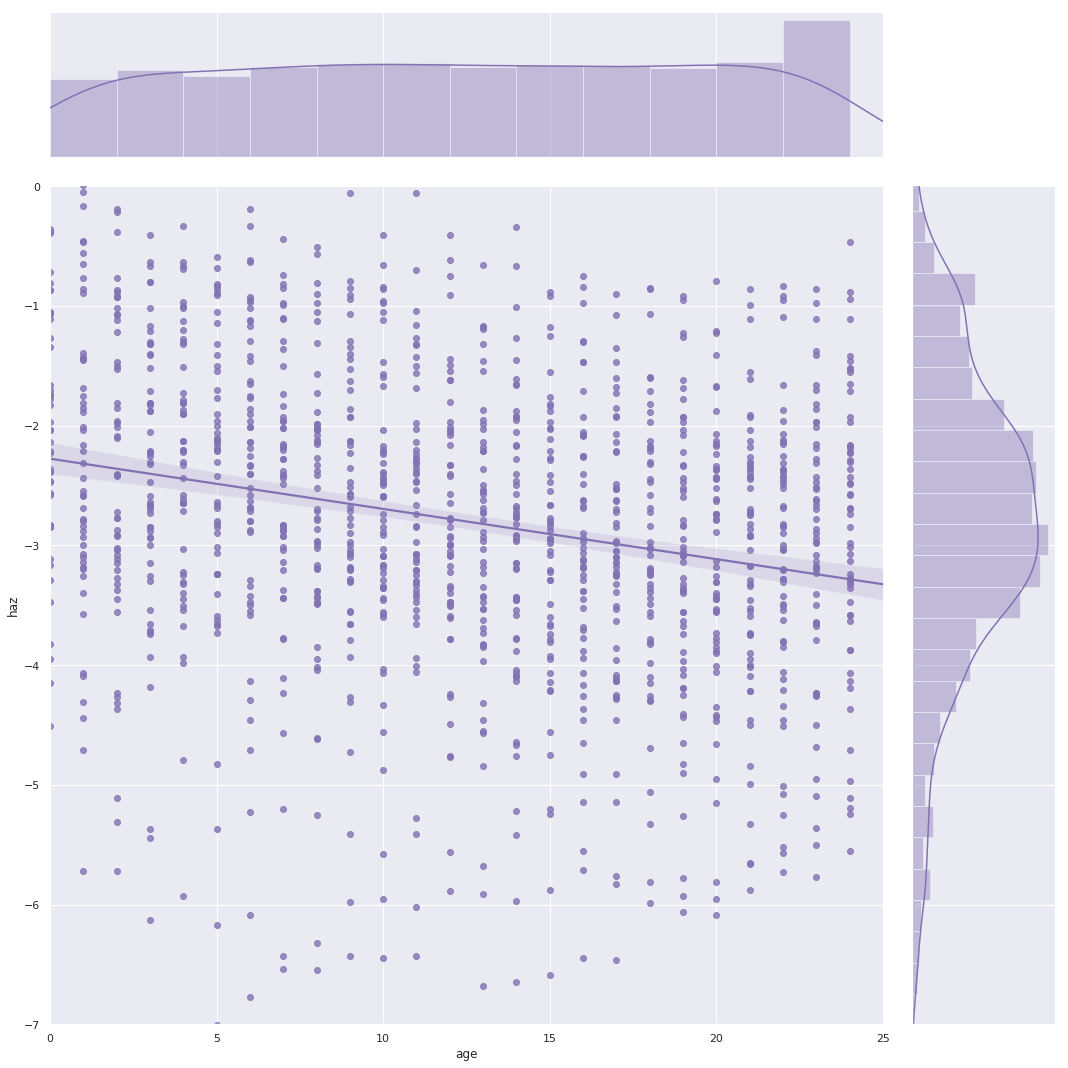

In [75]:
import seaborn as sns
sns.set(style="darkgrid")


g = sns.jointplot("age", "haz", data=anthro_f, kind="reg",
                  xlim=(0, 25), ylim=(-7, 0), color="m", height=15)

In [96]:
anthro_cc = pd.concat([anthro_case, anthro_control], ignore_index=True)

In [97]:
anthro_cc

,studyid,DOV,DOB,gender,weight,length,MUAC,source,age,vmon,...,sq22a,sq23a,ss2q22,ss2q24b,age_days,whz,haz,waz,comp,casecontrol
0,33,9-Dec-15,8-Dec-15,1,2.28,46.6,83.0,crf1,0,12,...,NaN,NaN,NaN,NaN,1,-1.96,-1.83,-2.51,NaN,Case
1,33,8-Mar-16,8-Dec-15,1,3.04,53.8,82.0,crf2,3,3,...,NaN,NaN,NaN,NaN,91,-4.00,-3.72,-5.92,NaN,Case
2,33,9-Apr-16,8-Dec-15,1,3.24,54.0,80.0,crf4,4,4,...,0.0,0.0,NaN,NaN,123,-3.35,-4.79,-6.45,NaN,Case
3,33,7-May-16,8-Dec-15,1,3.29,54.5,80.0,crf4,5,5,...,0.0,0.0,NaN,NaN,151,-3.57,-5.37,-7.01,NaN,Case
4,33,11-Jun-16,8-Dec-15,1,4.21,56.6,90.0,crf4,6,6,...,12.0,12.0,NaN,NaN,186,-2.11,-5.23,-5.61,NaN,Case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,3014,26-Oct-18,26-Apr-17,2,11.00,78.0,162.0,crf4,18,10,...,0.0,0.0,NaN,NaN,548,1.18,-1.04,0.40,NaN,Control
2478,3014,30-Nov-18,26-Apr-17,2,11.00,79.0,165.0,crf4,19,11,...,0.0,0.0,NaN,NaN,583,1.00,-0.87,0.32,NaN,Control
2479,3014,28-Dec-18,26-Apr-17,2,11.00,81.0,157.0,crf4,20,12,...,0.0,0.0,NaN,NaN,611,0.94,-0.75,0.33,NaN,Control
2480,3014,26-Jan-19,26-Apr-17,2,12.00,82.0,161.0,crf4,21,1,...,0.0,0.0,NaN,NaN,640,1.13,-0.68,0.50,NaN,Control


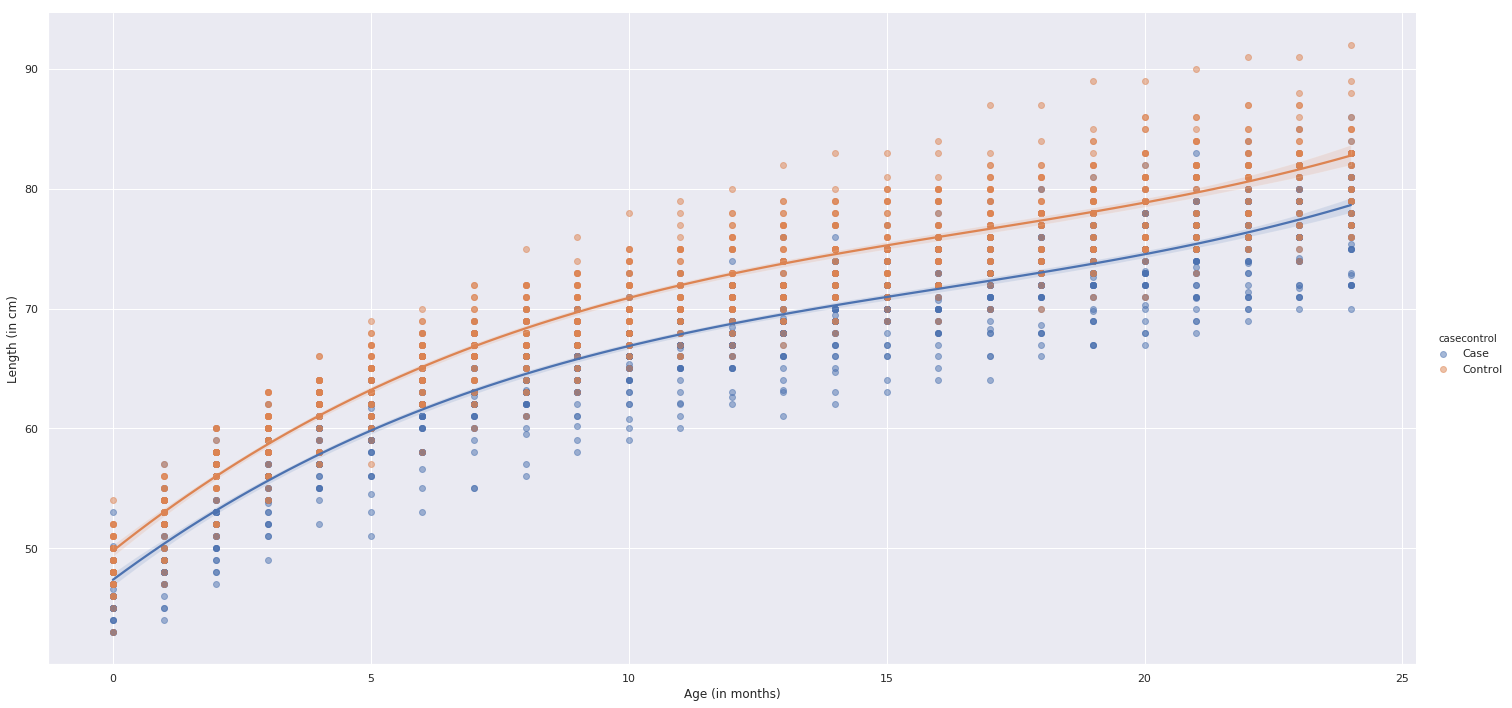

In [168]:
import seaborn as sns
sns.set()

# Load the iris dataset
iris = sns.load_dataset("iris")

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="age", y="length", hue="casecontrol",
               truncate=True, height=10, data=anthro_cc, order=3, aspect=2, scatter_kws={'alpha': 0.5})

# Use more informative axis labels than are provided by default
g.set_axis_labels("Age (in months)", "Length (in cm)")

In [144]:
anthro = pd.read_csv('data/Copy of Anthro_with_morbidity_biopsy kids.csv')
yael = pd.read_csv('data/Copy of Yael final file 20190801 no names_LE.csv')
rectal = pd.read_csv('data/rectl_list.csv')

In [145]:
anthro

,studyid,DOV,DOB,gender,weight,length,MUAC,source,age,vmon,...,sq22a,sq23a,ss2q22,ss2q24b,age_days,whz,haz,waz,comp,casecontrol
0,1,7-Mar-16,6-Mar-16,1,2.57,47.7,101.0,crf1,0,3,...,NaN,NaN,NaN,NaN,1,-1.35,-1.25,-1.77,NaN,NaN
1,1,6-Apr-16,6-Mar-16,1,4.01,52.2,110.0,crf2,1,4,...,NaN,NaN,NaN,NaN,31,0.58,-1.34,-0.84,NaN,NaN
2,1,7-May-16,6-Mar-16,1,5.14,56.0,121.0,crf2,2,5,...,NaN,NaN,NaN,NaN,62,0.71,-1.27,-0.69,NaN,NaN
3,1,6-Jun-16,6-Mar-16,1,6.19,59.5,130.0,crf2,3,6,...,NaN,NaN,NaN,NaN,92,0.67,-0.97,-0.27,NaN,NaN
4,1,9-Jul-16,6-Mar-16,1,7.14,63.8,141.0,crf2,4,7,...,NaN,NaN,NaN,NaN,125,0.28,-0.15,0.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20425,3118,9-Sep-17,4-Jul-17,1,4.00,54.0,114.0,crf2,2,9,...,NaN,NaN,NaN,NaN,67,-1.50,-2.53,-3.33,NaN,NaN
20426,3118,10-Oct-17,4-Jul-17,1,4.00,57.0,116.0,crf2,3,10,...,NaN,NaN,NaN,NaN,98,-1.66,-2.69,-3.39,NaN,NaN
20427,3119,6-Jul-17,4-Jul-17,1,3.00,45.0,96.0,crf1,0,7,...,NaN,NaN,NaN,NaN,2,0.82,-2.66,-1.57,NaN,NaN
20428,3119,4-Aug-17,4-Jul-17,1,4.00,50.0,111.0,crf2,1,8,...,NaN,NaN,NaN,NaN,31,0.96,-2.47,-1.56,NaN,NaN


In [146]:
ids = list(rectal['studyid'])

In [148]:
anthro_rectal = anthro[anthro['studyid'].isin(ids)].reset_index(drop=True)

In [152]:
anthro_rc = pd.concat([anthro_control, anthro_rectal], ignore_index=True)

In [316]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = sklearn.linear_model.LinearRegression()
regr.fit(anthro_f['age'].values.reshape(-1, 1), anthro_f['length'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [320]:
pearsonr(anthro_f['age'].values, anthro_f['length'].values)

(0.9386085671551628, 1.2873231204020881e-166)

In [318]:
line_y = regr.predict(np.linspace(0, 24, 50).reshape(-1, 1)).T[0]

line_x = np.linspace(0, 24, 50)

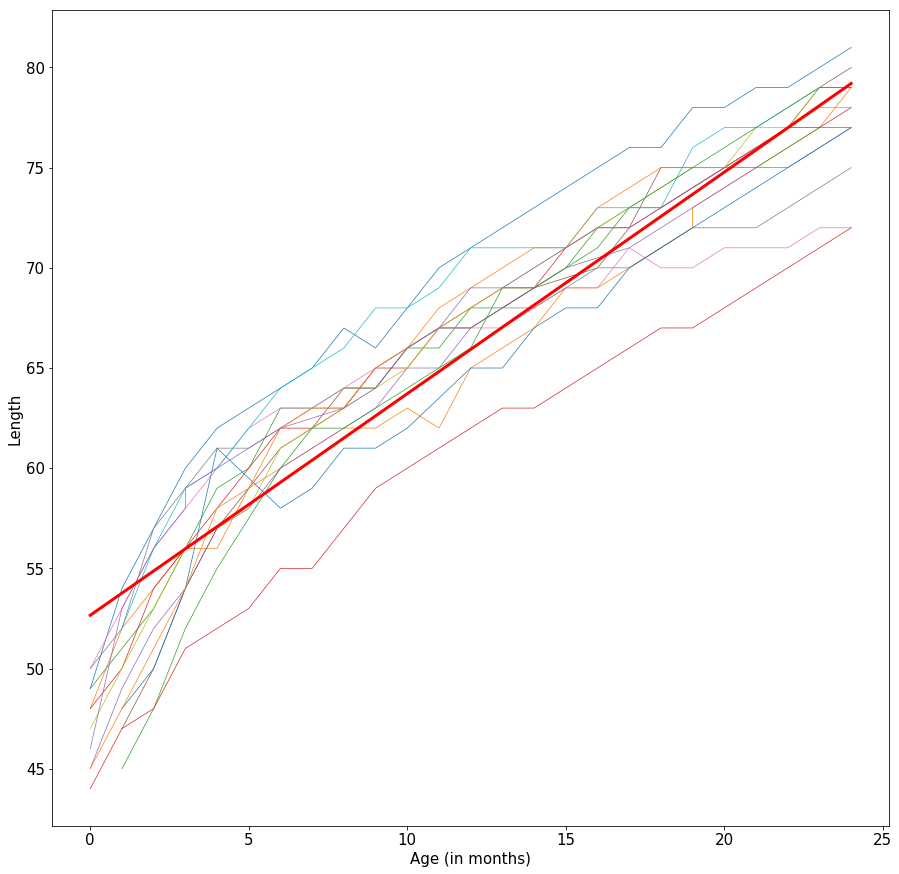

In [319]:
plt.figure(figsize=(15, 15))
plt.rcParams.update({'font.size': 15})

for stid in np.unique(anthro_f['studyid']):
    tmp = anthro_f[anthro_f['studyid']==stid]
    
    x = np.array(tmp['age'])
    y = np.array(tmp['length'])
    
    plt.xlabel('Age (in months)')
    plt.ylabel('Length')
    
    plt.plot(x, y, linewidth=0.7)
    
plt.plot(line_x, line_y, linewidth=3, color='red')

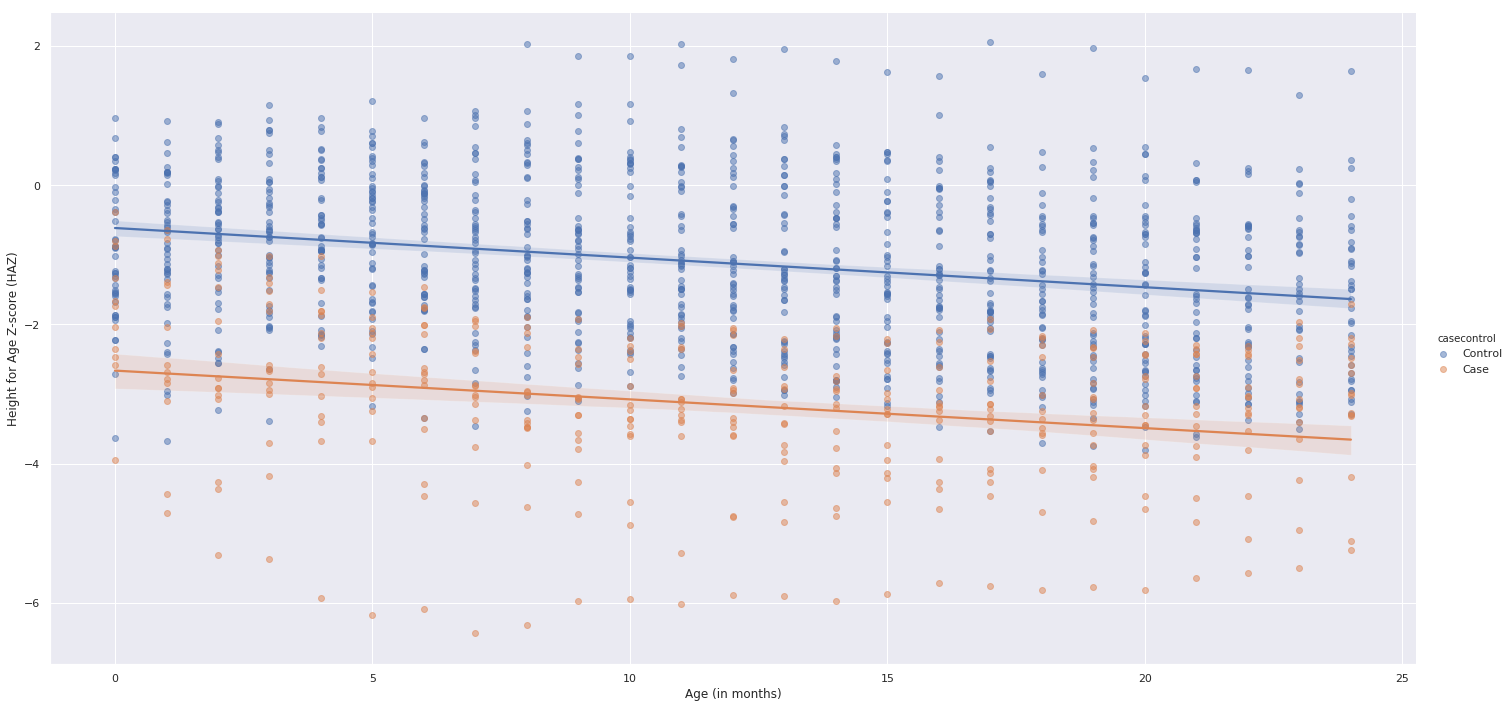

In [160]:
import seaborn as sns
sns.set()

# Load the iris dataset
iris = sns.load_dataset("iris")

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="age", y="haz", hue="casecontrol",
               truncate=True, height=10, data=anthro_rc, order=1, aspect=2, scatter_kws={'alpha': 0.5})

# Use more informative axis labels than are provided by default
g.set_axis_labels("Age (in months)", "Height for Age Z-score (HAZ)")

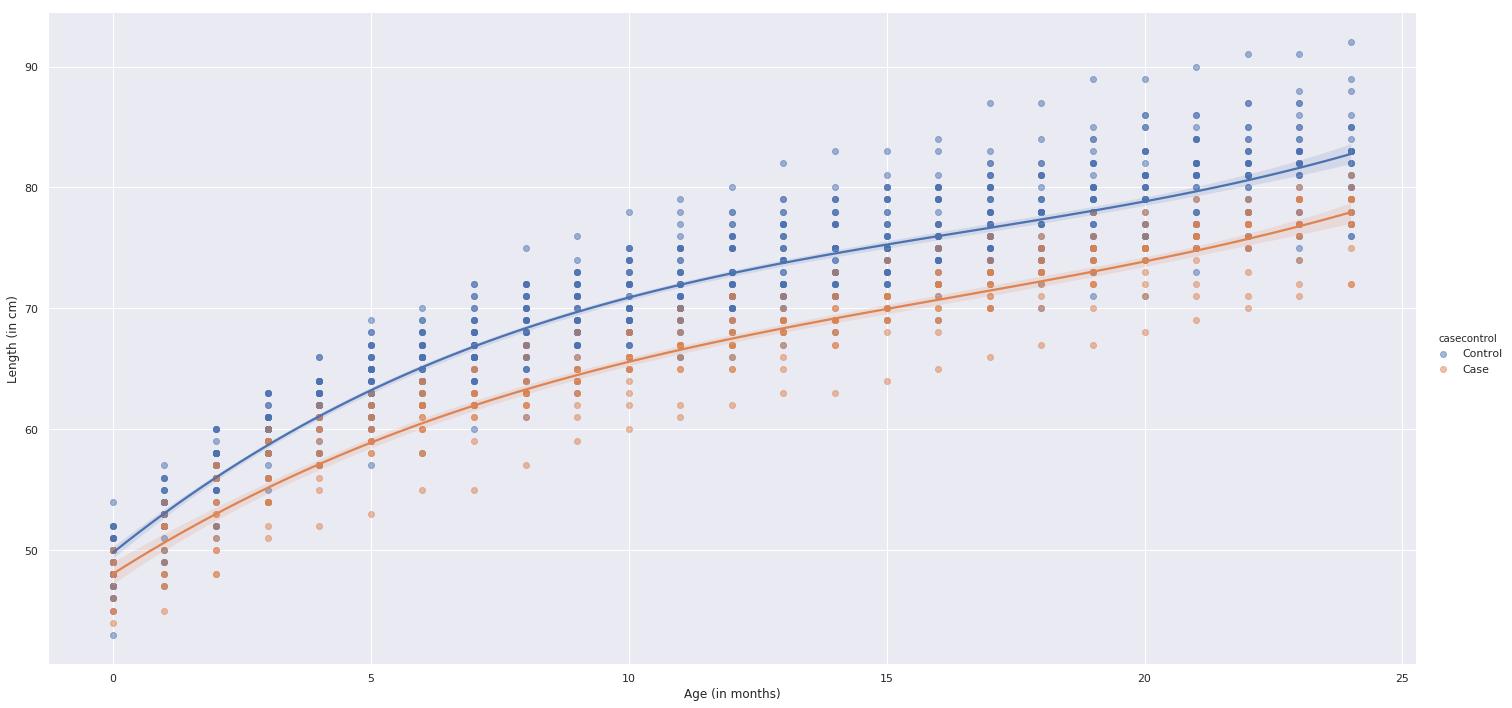

In [166]:
import seaborn as sns
sns.set()

# Load the iris dataset
iris = sns.load_dataset("iris")

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="age", y="length", hue="casecontrol",
               truncate=True, height=10, data=anthro_rc, order=3, aspect=2, scatter_kws={'alpha': 0.5})

# Use more informative axis labels than are provided by default
g.set_axis_labels("Age (in months)", "Length (in cm)")